In [1]:
# Get the data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df  = pd.read_csv('CAERS_ASCII_2004_2017Q2.csv')

In [4]:
df.head()

,RA_Report #,RA_CAERS Created Date,AEC_Event Start Date,PRI_Product Role,PRI_Reported Brand/Product Name,PRI_FDA Industry Code,PRI_FDA Industry Name,CI_Age at Adverse Event,CI_Age Unit,CI_Gender,AEC_One Row Outcomes,SYM_One Row Coded Symptoms
0,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL..."
1,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL..."
2,65333,1/1/2004,NaN,Suspect,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,13,Ice Cream Prod,NaN,Not Available,Female,VISITED AN ER,"NAUSEA, DYSGEUSIA, DIARRHOEA"
3,65335,1/1/2004,11/24/2003,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,3.0,Month(s),Not Available,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING"
4,65336,1/1/2004,NaN,Suspect,ENFIMIL LIPIL BABY FORMULA,40,Baby Food Prod,NaN,Not Available,Not Available,VISITED A HEALTH CARE PROVIDER,"GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90786 entries, 0 to 90785
Data columns (total 12 columns):
RA_Report #                        90786 non-null int64
RA_CAERS Created Date              90786 non-null datetime64[ns]
AEC_Event Start Date               53653 non-null datetime64[ns]
PRI_Product Role                   90786 non-null object
PRI_Reported Brand/Product Name    90786 non-null object
PRI_FDA Industry Code              90786 non-null int64
PRI_FDA Industry Name              90786 non-null object
CI_Age at Adverse Event            52926 non-null float64
CI_Age Unit                        90786 non-null object
CI_Gender                          90786 non-null object
AEC_One Row Outcomes               90786 non-null object
SYM_One Row Coded Symptoms         90781 non-null object
dtypes: datetime64[ns](2), float64(1), int64(2), object(7)
memory usage: 8.3+ MB


In [5]:
#Converting date to usable formats

df['RA_CAERS Created Date'] = pd.to_datetime(df['RA_CAERS Created Date'], format = '%m/%d/%Y')
df['AEC_Event Start Date'] = pd.to_datetime(df['AEC_Event Start Date'], format='%m/%d/%Y')

In [6]:
df.head()

,RA_Report #,RA_CAERS Created Date,AEC_Event Start Date,PRI_Product Role,PRI_Reported Brand/Product Name,PRI_FDA Industry Code,PRI_FDA Industry Name,CI_Age at Adverse Event,CI_Age Unit,CI_Gender,AEC_One Row Outcomes,SYM_One Row Coded Symptoms
0,65325,2004-01-01,2003-08-04,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL..."
1,65325,2004-01-01,2003-08-04,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL..."
2,65333,2004-01-01,NaT,Suspect,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,13,Ice Cream Prod,NaN,Not Available,Female,VISITED AN ER,"NAUSEA, DYSGEUSIA, DIARRHOEA"
3,65335,2004-01-01,2003-11-24,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,3.0,Month(s),Not Available,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING"
4,65336,2004-01-01,NaT,Suspect,ENFIMIL LIPIL BABY FORMULA,40,Baby Food Prod,NaN,Not Available,Not Available,VISITED A HEALTH CARE PROVIDER,"GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION"


### Dataset contains approx 2/3 female records.

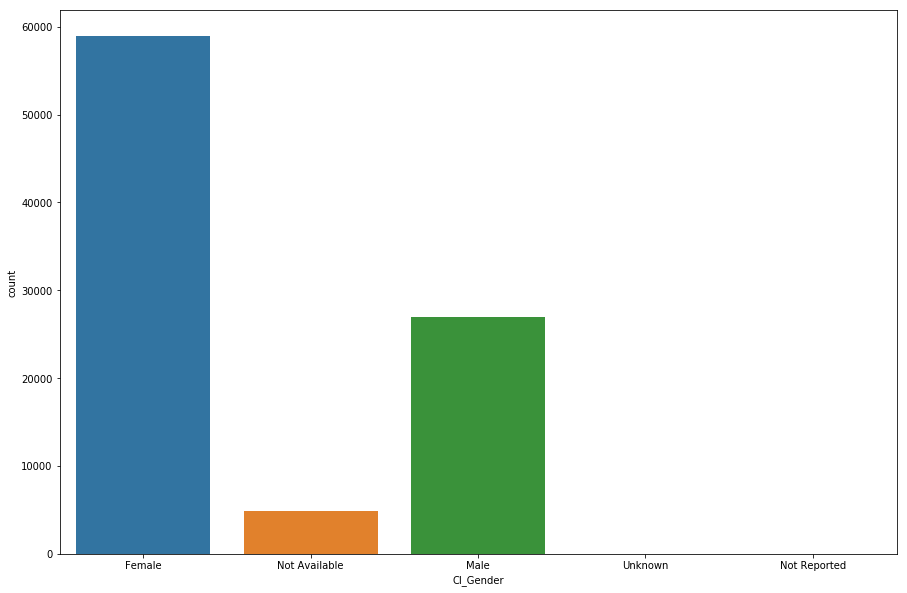

In [10]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(df['CI_Gender'])

### ReadME file statest that there are duplicates. Let's verify that

In [12]:
print(df[23:31].drop(['RA_CAERS Created Date', 'AEC_Event Start Date','PRI_Product Role'], axis = 1))

    RA_Report # PRI_Reported Brand/Product Name  PRI_FDA Industry Code  \
23        65420         DIET CAFFEINE FREE COKE                     29   
24        65420                       DIET COKE                     29   
25        65420                      DIET PEPSI                     29   
26        65420                     DIET SPRITE                     29   
27        65420                            JAMS                     22   
28        65420                LISTERINE STRIPS                     53   
29        65420                      NUTRASWEET                     45   
30        65420                        PUDDINGS                     35   

                     PRI_FDA Industry Name  CI_Age at Adverse Event  \
23                        Soft Drink/Water                     33.0   
24                        Soft Drink/Water                     33.0   
25                        Soft Drink/Water                     33.0   
26                        Soft Drink/Water       

### The rows are for the same patient. So rows are duplicated for patients who have ingested many produts. In addition ot this hte README staes that there may be multiple reports for as ingle patiend when the reports have been submitted errorneously by multiple people. Perhaps we could build a system to identify these. Lets look at which types of products are potentially causing the most health events. 

Text(0.5,1,'Health event counts by product type')

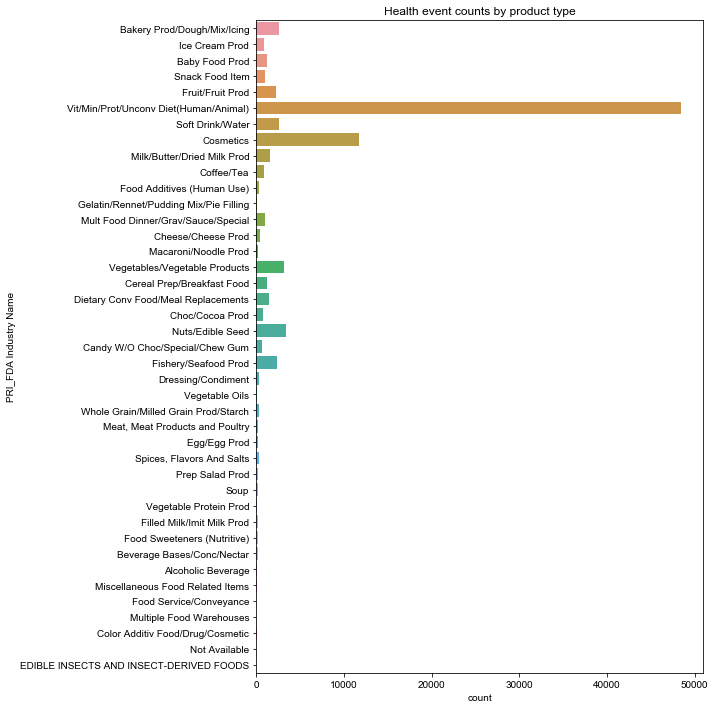

In [13]:
fig, ax = plt.subplots(figsize = (8,12))
sns.set_style("ticks")
sns.countplot(y=df['PRI_FDA Industry Name']).set_title('Health event counts by product type')

So Vit/Min/Prot/Unconv Diet(Human/Animal) and Cosmetics are by very far related to the most health events. Let's see which specific products cause many health events. By inspection of the most common products there is a 'redacted' value with 6081 observations, we will remove this as well as low frequency products to get a better picture of the data

Text(0.5,1,'Products with more than 150 health events')

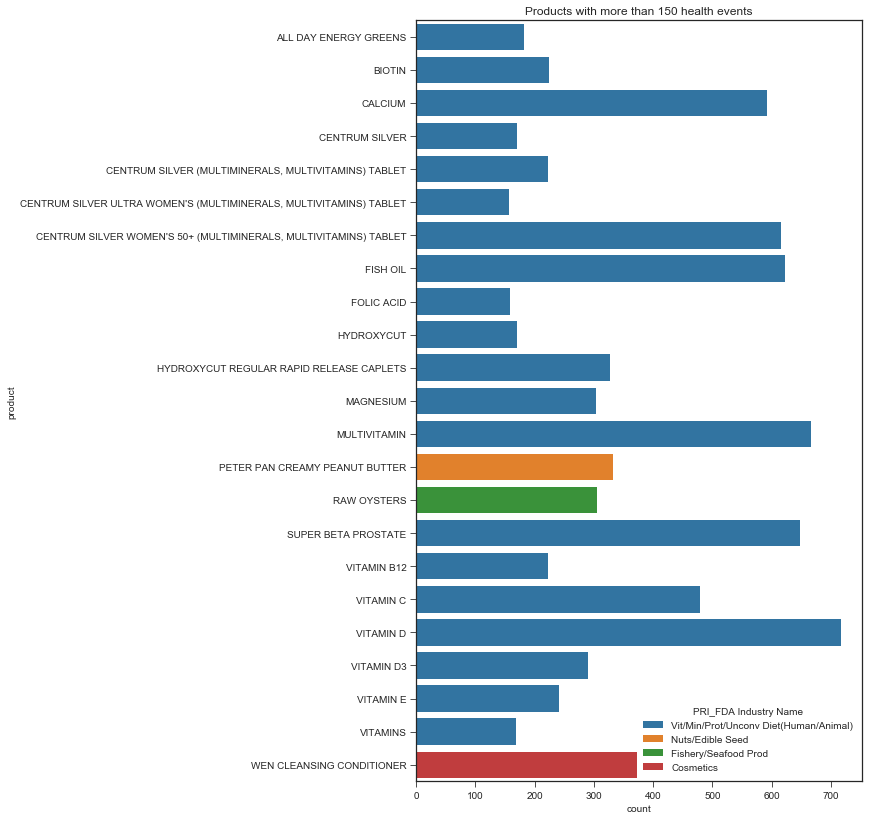

In [16]:
fig, ax = plt.subplots(figsize=(8,14))
product_count = df.groupby('PRI_Reported Brand/Product Name').size()
product_count_large = product_count[(product_count > 150) & (product_count.index != 'REDACTED')]
product_count_df = pd.DataFrame({'product':product_count_large.index,'count':product_count_large}, index = None)

new = product_count_df.merge(df[['PRI_Reported Brand/Product Name','PRI_FDA Industry Name']], how='inner', left_on='product',right_on='PRI_Reported Brand/Product Name').drop_duplicates()[['count','product','PRI_FDA Industry Name']]
sns.barplot(x ='count',y='product',hue='PRI_FDA Industry Name', data = new, dodge = False).set_title("Products with more than 150 health events")

Most of these are vitamin supplements as we may have expected after limiting by product type. also raw oysters and hari conditioner. Don't eat these. Peanut butter is presumably due to nut allergy sufferers.

### Symptoms
Let's take a look at the symptoms of these events split by product type

Text(0.5,1,'Health event counts by product type')

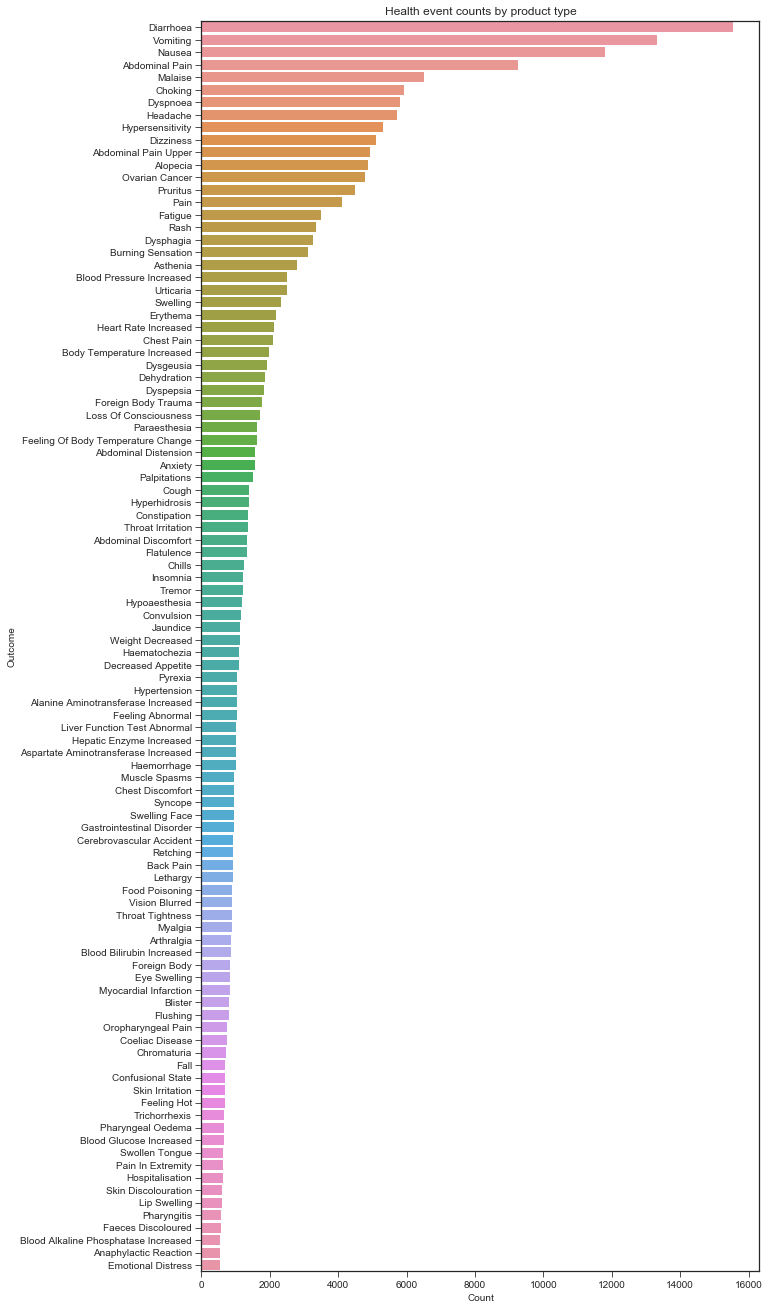

In [18]:
outcomes = []
for _, reactions in df['SYM_One Row Coded Symptoms'].astype(object).str.split(",").iteritems():
    outcomes += [str(l).strip().title() for l in pd.Series(reactions).astype(object)]

outcome_df = pd.DataFrame({'Outcome': pd.Series(outcomes).value_counts().index,'Count':pd.Series(outcomes).value_counts()})[:100]
fig, ax = plt.subplots(figsize = (10,23))
sns.barplot(x = 'Count', y='Outcome', data = outcome_df).set_title('Health event counts by product type')

### Effect of age

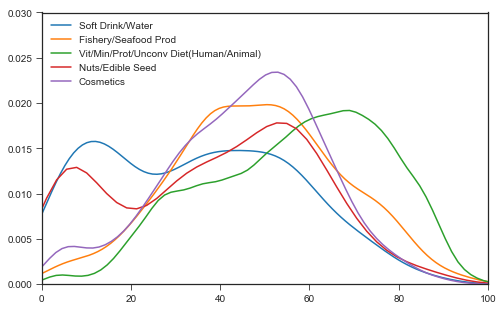

In [22]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.kdeplot(df[(df['CI_Age Unit'] == 'Year(s)') & (df['PRI_FDA Industry Name']=='Soft Drink/Water')]['CI_Age at Adverse Event'], label='Soft Drink/Water')
ax = sns.kdeplot(df[(df['CI_Age Unit'] == 'Year(s)') & (df['PRI_FDA Industry Name']=='Fishery/Seafood Prod')]['CI_Age at Adverse Event'], label='Fishery/Seafood Prod')
ax = sns.kdeplot(df[(df['CI_Age Unit'] == 'Year(s)') & (df['PRI_FDA Industry Name']=='Vit/Min/Prot/Unconv Diet(Human/Animal)')]['CI_Age at Adverse Event'], label='Vit/Min/Prot/Unconv Diet(Human/Animal)')
ax = sns.kdeplot(df[(df['CI_Age Unit'] == 'Year(s)') & (df['PRI_FDA Industry Name']=='Nuts/Edible Seed')]['CI_Age at Adverse Event'], label='Nuts/Edible Seed')
ax = sns.kdeplot(df[(df['CI_Age Unit'] == 'Year(s)') & (df['PRI_FDA Industry Name']=='Cosmetics')]['CI_Age at Adverse Event'], label='Cosmetics').set(xlim=(0, 100), ylim=(0,0.030))

### Observations
So 50-60 year olds are particularly susceptible to cosmetics.

Children and mature adults are susceptible to nuts.

Elderly are susceptible to vitamins/minerals. 

Late 50s seems to generally be the dangerous period.

In [23]:
#Report range
print(df['RA_CAERS Created Date'].max())
print(df['RA_CAERS Created Date'].min())

2017-06-30 00:00:00
2004-01-01 00:00:00


### Most deadly products

Text(0.5,1,'Products which were consumed by more than one patient who died')

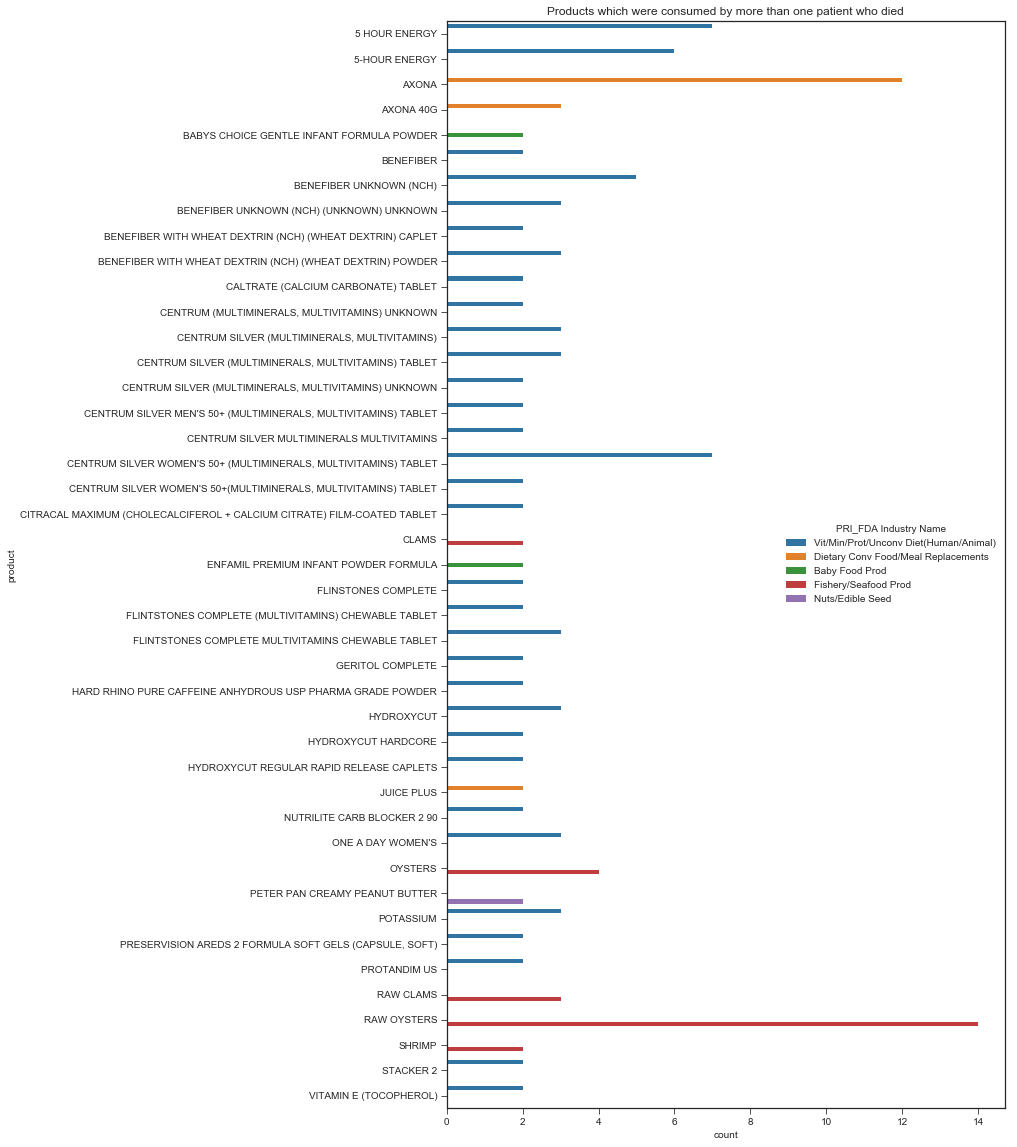

In [24]:
deadly=df[(df['SYM_One Row Coded Symptoms']!=np.NaN) & (df['SYM_One Row Coded Symptoms'].str.contains('DEATH'))]
fig, ax = plt.subplots(figsize=(10,20))
product_count=deadly.groupby('PRI_Reported Brand/Product Name').size()
product_count_large=product_count[(product_count>1) & (product_count.index!='REDACTED')]
product_count_df=pd.DataFrame({'product':product_count_large.index,'count':product_count_large}, index=None)
new=product_count_df.merge(deadly[['PRI_Reported Brand/Product Name','PRI_FDA Industry Name']],how='inner', left_on='product', right_on='PRI_Reported Brand/Product Name').drop_duplicates()[['count','product','PRI_FDA Industry Name']]
sns.barplot(x='count',y='product',hue='PRI_FDA Industry Name',data=new).set_title("Products which were consumed by more than one patient who died")